In [3]:
%reset -f
import numpy as np


import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib notebook

ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) # legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize':titlesize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams.update({'image.cmap':'rainbow'})

mpl.rcParams.update({'axes.formatter.useoffset':True})   # False ->no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

np.set_printoptions(precision=3,suppress=True) 
plt.close('all')

In [71]:
a = 0
b = 20
ab = (b-a)*.5
sig = 1
Nx = 400
x = np.linspace(a,b,Nx)
dx = x[1]-x[0]
xe= np.linspace(a-dx*.5,b+dx*.5,Nx+1) #(x[1:]+x[:-1])*.5
psi0 = np.exp(-(x -ab)**2/sig**2*.5)

def DD(x):
    rel = (x-a)/(b-a) * 1
    return 1e-1*(.1+rel+rel**2 + np.sin(rel))
D = DD(x)

# ft1 = D*dx(dx(f)) = Di * der2
# ft2 = dx(D*dx(f)) = Di+*(fi+1 - fi) + Di-*(fi - fi-1)
# ft3 = dx(dx(D*f)) = der2 (Df)
der2 = (np.eye(Nx,k=-1)+np.eye(Nx,k=1)-2*np.eye(Nx))/(dx**2)
dydt_1 = der2*(D[:,np.newaxis])
dydt_3 = der2*D

# Finite volume
der1L = ( np.eye(Nx) -np.eye(Nx,k=-1))/dx**2
der1R = (-np.eye(Nx) +np.eye(Nx,k=1))/dx**2
coeffEdge=DD(xe)
FVRe = coeffEdge[1:,np.newaxis]*der1R
FVLe = coeffEdge[:-1,np.newaxis]*der1L
dydt_2 = (FVRe-FVLe)
      
tmax = 10
ts = np.linspace(0,tmax,100)
def dpsidt(psi,t,r,A):
    res = A.dot(psi)
    res[0]=0 #Dirichlet
    res[-1]=0
    return res

psis1 = sc.integrate.odeint(dpsidt,psi0,ts,args=(x,dydt_1))
psis2 = sc.integrate.odeint(dpsidt,psi0,ts,args=(x,dydt_2))
psis3 = sc.integrate.odeint(dpsidt,psi0,ts,args=(x,dydt_3))


<IPython.core.display.Javascript object>


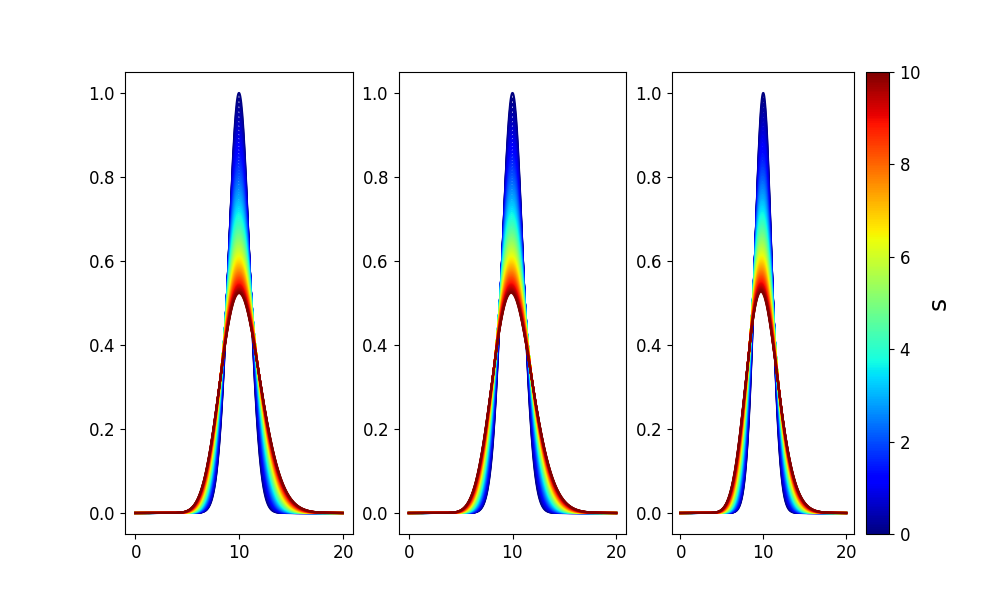

<IPython.core.display.Javascript object>


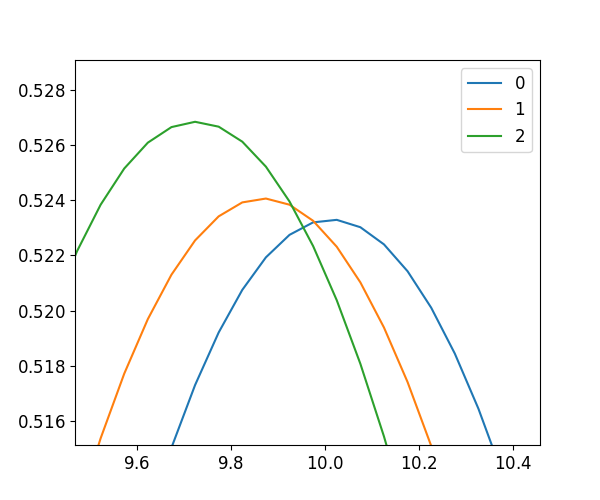

In [72]:
PSIS = [psis1,psis2,psis3]

time_scale=1
tlabel='s'
fig1, ax1 = plt.subplots(figsize=(10,6),dpi=100,ncols=3)
norm = mpl.colors.Normalize(vmin=ts.min()/time_scale, vmax=ts.max()/time_scale)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

fig2 = plt.figure()
ax2 = plt.gca()

for i,psis in enumerate(PSIS):
    for j , t in enumerate(ts):
        ax1[i].plot(x,psis[j,:], c=cmap.to_rgba(t/time_scale))
        
    ax2.plot(x,psis[-1,:],label=i)
        
    #ax1[i].set_yscale('log')
cb=fig1.colorbar(cmap,label=tlabel) #ticks = np.linspace(0,tmax/time_scale,4),
tick_locator = mpl.ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()


ax2.legend(loc=0)

In [40]:
print(der2_1)
print(der2_3)

[[ -0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1.  -2.   1.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   2.  -4.   2.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   3.  -6.   3.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   4.  -8.   4.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   5. -10.   5.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   6. -12.   6.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   7. -14.   7.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   8. -16.   8.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   9. -18.   9.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  10. -20.]]
[[ -0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  -2.   2.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.  -4.   3.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   2.  -6.   4.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   3.  -8.   5.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   4. -10.   6.   0.   0.   0.   0.]
 [  0.   0.  